# 第三章

### example 3.1

In [4]:
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime
from itertools import product
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

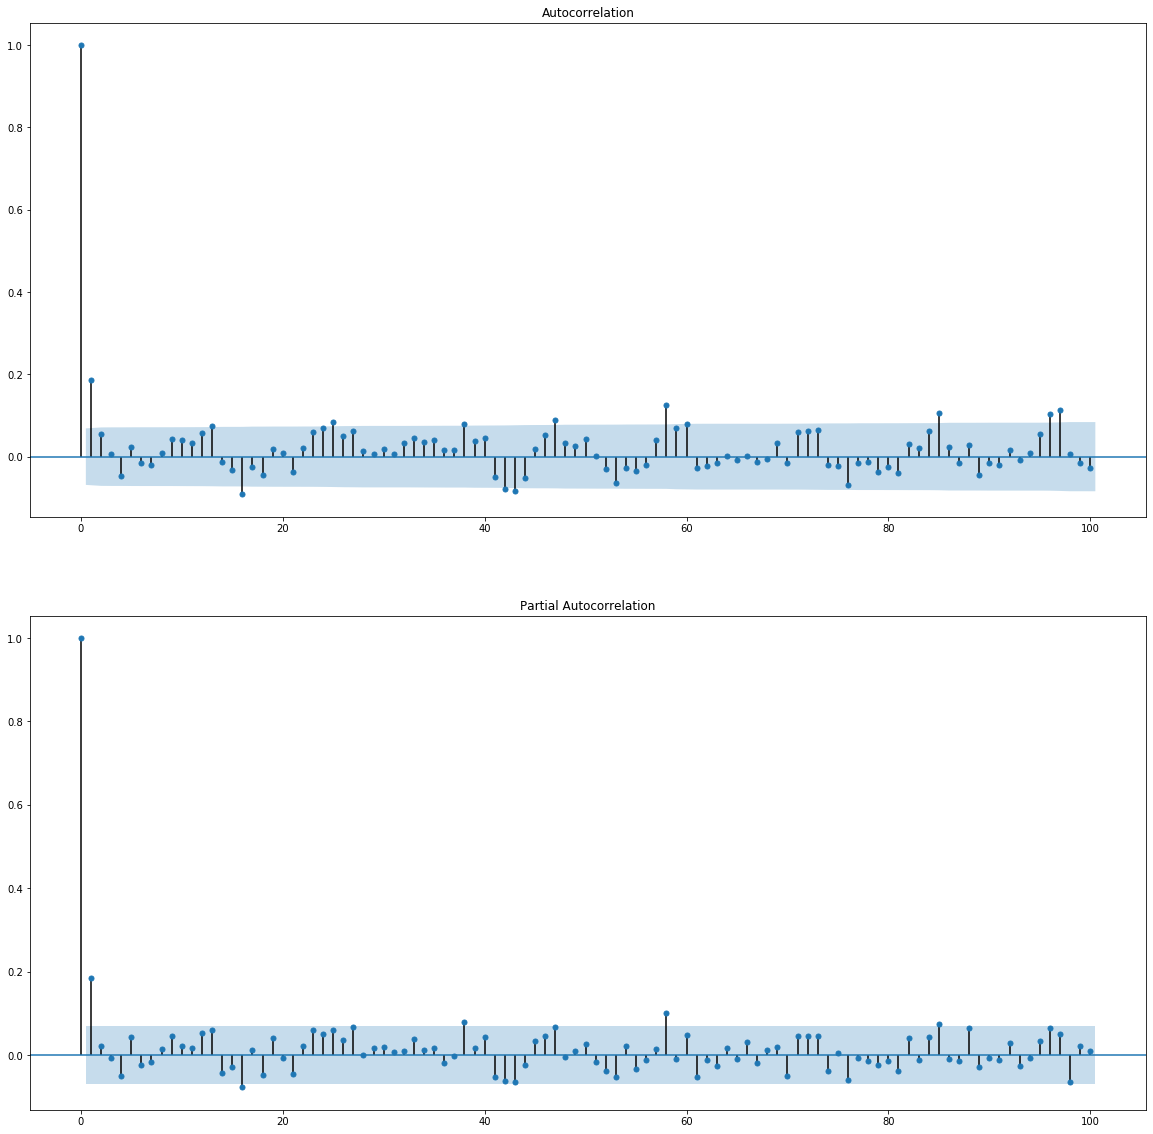

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  815
Model:                     ARMA(1, 0)   Log Likelihood               -1151.312
Method:                           mle   S.D. of innovations              0.994
Date:                Thu, 13 Aug 2020   AIC                           2306.625
Time:                        13:23:20   BIC                           2316.031
Sample:                             0   HQIC                          2310.235
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.1860      0.034      5.404      0.000       0.119       0.253
                                    Roots                                    
                  Real          Imaginary           M

In [6]:
#读取NAO的数据
df = pd.read_excel('nao.xlsx')
data1=df.iloc[3:]
data=data1['Unnamed: 1'].tolist()
data=np.array(data)
# 求出序列的ACF and PACF
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')
fig, axes = plt.subplots(2,1, figsize=(20,20))
plot_acf(data, lags=100, ax=axes[0])
plot_pacf(data, lags=100, ax=axes[1])
plt.show()
##这里定阶p和q都是1
##编写AR(1)模型
order = (1,0)
tempModel = ARMA(data,order).fit(ic='aic', method='mle', trend='nc')
print(tempModel.summary())
##进行R2检验
delta = tempModel.fittedvalues - data # 残差
score = 1 - delta.var()/data.var()
print(score)
#这里编写MA(1)
order2 = (0,1)
tempModel2 = ARMA(data,order2).fit(ic='aic', method='mle', trend='nc')
print(tempModel.summary())
##进行R2检验
delta2 = tempModel2.fittedvalues - data # 残差
score2 = 1 - delta2.var()/data.var()
print(score2)

### example 3.2

[ 1.02825     2.36504167  2.3175      2.35083333  2.45183333  2.46616667
  2.46841667  2.48558333  2.415125    2.389875    2.41816667  2.39604167
  2.40104167  2.40083333  2.3835      2.36670833  2.365625    2.34858333
  2.334375    2.13354167  2.097375    2.09770833  2.13058333  2.096
  2.06404167  2.11508333  2.04733333  1.713875    1.60616667  1.56166667
  1.61329167  1.62108333  1.58766667  1.63779167  1.86591667  2.35641667
  3.81        3.797       3.906       3.937       3.969       3.971
  4.005       4.072       4.071       4.104       4.072       4.071
  5.218       5.165       5.008       4.955       5.136       4.977
  4.027       5.091       4.991       5.02        4.858       4.553
  4.148       4.099       3.914       3.921       3.854       3.845
  4.121       6.605       6.603       6.459       6.375       6.127
  6.014       5.523       5.179       4.816       4.294       4.159
  3.76        3.625       3.584       3.305       3.152       3.107
  3.276       3.287    

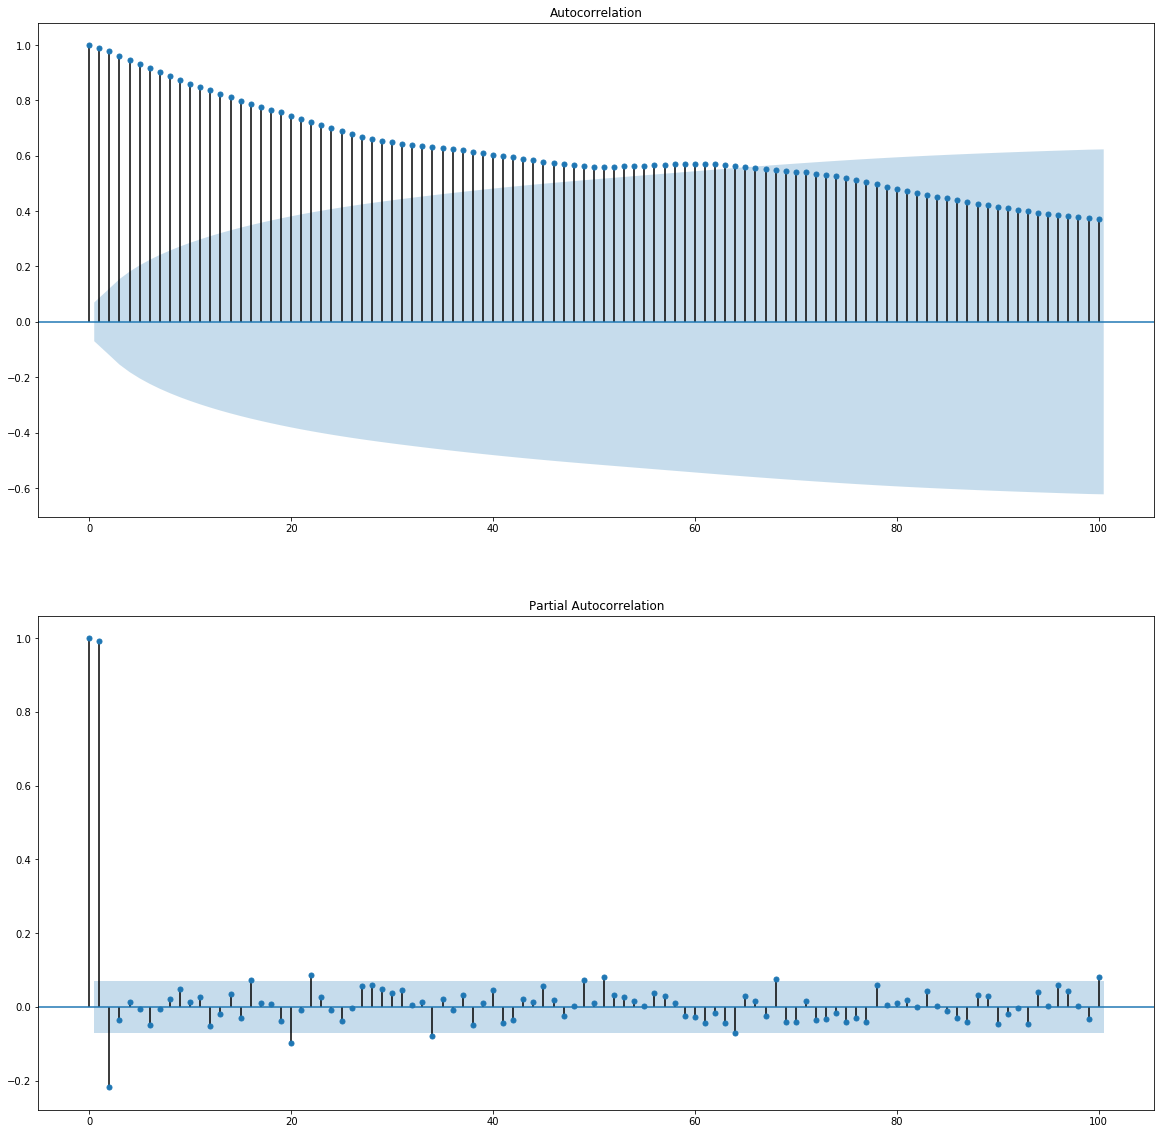

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  785
Model:                     ARMA(1, 0)   Log Likelihood                -498.259
Method:                           mle   S.D. of innovations              0.455
Date:                Thu, 13 Aug 2020   AIC                           1000.519
Time:                        13:24:35   BIC                           1009.850
Sample:                             0   HQIC                          1004.107
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9972      0.002    512.190      0.000       0.993       1.001
                                    Roots                                    
                  Real          Imaginary           M

In [8]:
df = pd.read_excel('interest_rates.xlsx')
data1=df.iloc[3:788]
data=data1['Unnamed: 1'].tolist()
data=np.array(data)
print(data)
# 求出序列的ACF and PACF
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')
fig, axes = plt.subplots(2,1, figsize=(20,20))
plot_acf(data, lags=100, ax=axes[0])
plot_pacf(data, lags=100, ax=axes[1])
plt.show()
##这里定阶p和q都是1
##编写AR(1)模型
order = (1,0)
tempModel = ARMA(data,order).fit(ic='aic', method='mle', trend='nc')
print(tempModel.summary())
##进行R2检验
delta = tempModel.fittedvalues - data # 残差
score = 1 - delta.var()/data.var()
print(score)

### example 3.3

[ 18.3  26.7  38.3  60.   96.7  48.3  33.3  16.7  13.3   5.    0.    0.
   3.3  18.3  45.   78.3 105.  100.   65.   46.7  43.3  36.7  18.3  35.
  66.7 130.  203.3 171.7 121.7  78.3  58.3  18.3   8.3  26.7  56.7 116.7
 135.  185.  168.3 121.7  66.7  33.3  26.7   8.3  18.3  36.7  66.7 100.
 134.8 139.   79.5  79.7  51.2  20.3  16.   17.   54.   79.3  90.  104.8
 143.2 102.   75.2  60.7  34.8  19.   63.  116.3 176.8 168.  136.  110.8
  58.   51.   11.7  33.  154.2 257.3 209.8 141.3 113.5  64.2  38.   17.
  40.2 138.2 220.  218.2 196.8 149.8 111.  100.   78.2  68.3  35.5  26.7
  10.7   6.8  11.3  24.2  56.7  75.   71.8  79.2  70.3  46.8  16.8  13.5
   4.2   0.    2.3   8.3  20.3  23.2  59.   76.3  68.3  52.9  38.5  24.2
   9.2   6.3   2.2  11.4  28.2  59.9  83.  108.5 115.2 117.4  80.8  44.3
  13.4  19.5  85.8 192.7 227.3 168.7 143.  105.5  63.3  40.3  18.1  25.1
  65.8 102.7 166.3 208.3 182.5 126.3 122.  102.7  74.1  39.   12.7   8.2
  43.4 104.4 178.3 182.2 146.6 112.1  83.5  89.2  57.8 

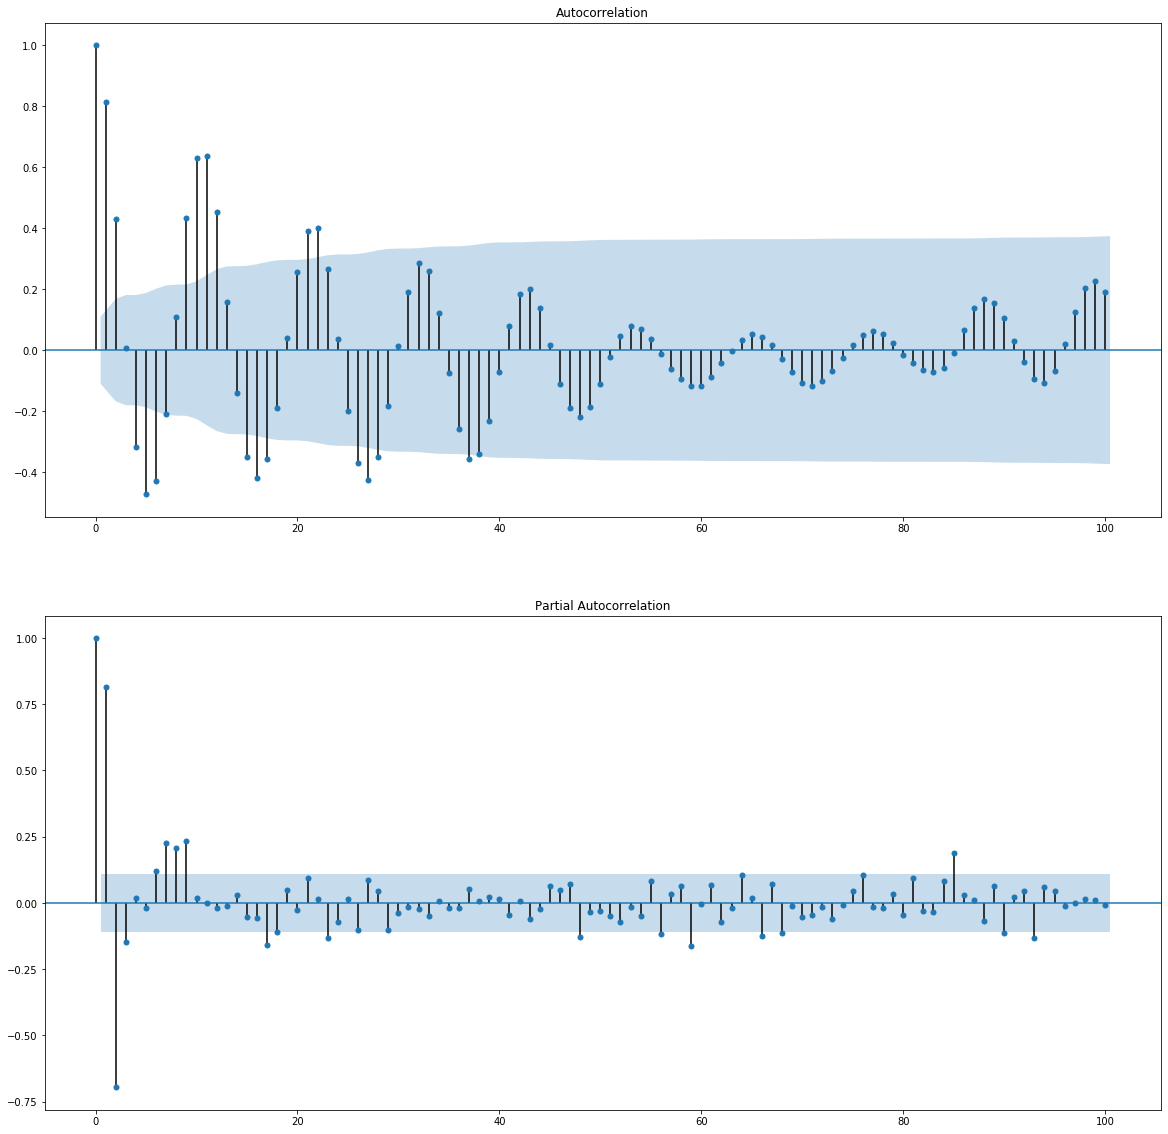

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  317
Model:                     ARMA(9, 0)   Log Likelihood               -1456.982
Method:                           mle   S.D. of innovations             23.777
Date:                Thu, 13 Aug 2020   AIC                           2933.965
Time:                        13:25:27   BIC                           2971.554
Sample:                             0   HQIC                          2948.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1929      0.054     22.016      0.000       1.087       1.299
ar.L2.y       -0.4067      0.086     -4.724      0.000      -0.575      -0.238
ar.L3.y       -0.1238      0.089     -1.389      0.1

In [9]:
#读取sunspots的数据
df = pd.read_excel('sunspots.xlsx')
data1=df.iloc[3:321]
data=data1['Unnamed: 1'].tolist()
data=np.array(data)
print(data)
# 求出序列的ACF and PACF
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')
fig, axes = plt.subplots(2,1, figsize=(20,20))
plot_acf(data, lags=100, ax=axes[0])
plot_pacf(data, lags=100, ax=axes[1])
plt.show()
##这里定阶p和q都是1
##编写AR(9)模型
order = (9,0)
tempModel = ARMA(data,order).fit(ic='aic', method='mle', trend='nc')
print(tempModel.summary())
##进行R2检验
delta = tempModel.fittedvalues - data # 残差
score = 1 - delta.var()/data.var()
print(score)
##编写AR(2)模型
order = (2,0)
tempModel = ARMA(data,order).fit(ic='aic', method='mle', trend='nc')
print(tempModel.summary())
##进行R2检验
delta = tempModel.fittedvalues - data # 残差
score = 1 - delta.var()/data.var()
print(score)